In [1]:
import pulp

In [2]:
from pulp import LpMaximize, LpProblem, LpStatus, lpSum, LpVariable

model = LpProblem(name="cake-problem", sense=LpMaximize)
x = LpVariable(name="c", lowBound=0)
y = LpVariable(name="p", lowBound=0)

obj_func = 75 * x + 40 * y
model += obj_func

model += (6 * x + 4 * y <= 155, "flour_constraint")
model += (4 * x + 3 * y <= 80, "time_constraint")

In [3]:
model

cake-problem:
MAXIMIZE
75*c + 40*p + 0
SUBJECT TO
flour_constraint: 6 c + 4 p <= 155

time_constraint: 4 c + 3 p <= 80

VARIABLES
c Continuous
p Continuous

In [4]:
status = model.solve()


In [5]:
print(f"status: {model.status}, {LpStatus[model.status]}")

status: 1, Optimal


In [6]:
for var in model.variables():
    print(f"{var.name}: {var.value()}")

c: 20.0
p: 0.0


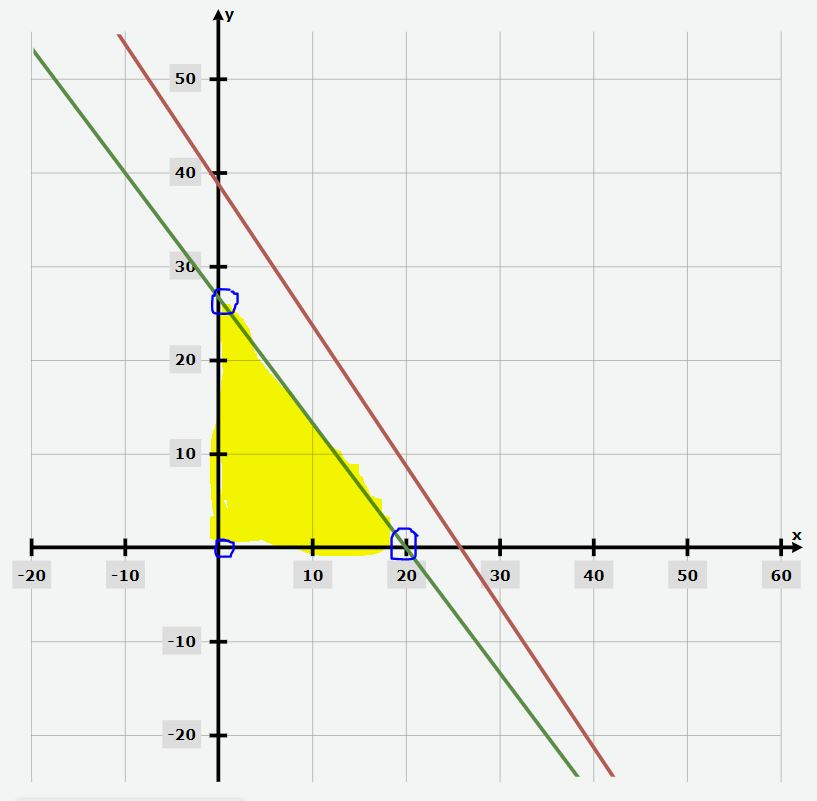

In [9]:
from IPython.display import Image
Image(filename='image1.JPG') 